In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive')

In [4]:
import pandas as pd
df = pd.read_csv('train_v2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(105471, 771)

In [6]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,0,0,0,5,0,0,0.73180,0.72124,0.749280,...,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,1,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,0,0,0,6,0,0,0.65705,0.64069,0.626200,...,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,1,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,0,0,0,13,0,0,0.74710,0.75878,0.654685,...,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,1,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,0,0,0,4,0,0,0.77405,0.78929,0.750675,...,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,1,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,0,0,0,26,0,0,0.60315,0.53367,0.696150,...,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,1,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [9]:
df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.047730e+05,105471.000000,105471.000000,105471.000000,105471.000000,104773.000000,102899.000000,105471.0,105471.0,105471.0,105471.000000,105471.0,105471.0,105417.000000,105417.000000,105469.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,1.054710e+05,105471.000000,104039.000000,105469.000000,104618.000000,104618.000000,104618.000000,104013.000000,105469.000000,105469.000000,105469.000000,105469.000000,105238.000000,104671.000000,104671.000000,104671.000000,104137.000000,105313.000000,105313.000000,103631.000000,105471.0,105470.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,134.596862,11.349015,0.696120,0.678140,4.010386e+06,0.673572,0.649476,0.510736,0.685829,0.746194,0.726551,3.014404e+09,82.179803,63.420561,1.108926e+06,92.134281,86.490683,103.850939,91.672933,90.045642,0.860795,0.0,0.0,0.0,17.422571,0.0,0.0,0.645473,0.649092,0.632909,...,6.618006,18.424060,645.876713,2436.711967,1.354909e+05,4.192035,-0.040303,5.497546,11.139884,9.464936,8.115740,0.138719,6.130018,5.500419,3.390325,2.158617,0.119762,10.602136,8.782883,7.341984,0.136195,12.921228,12.103488,-0.253806,1.0,-0.471021,-0.476605,-0.471572,-0.491973,-8.786110,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,14.504043,3.669019,0.242829,0.241969,6.623236e+06,0.232733,0.246958,0.173126,0.241082,0.237795,0.233876,2.070153e+09,28.316093,32.431329,3.015962e+05,36.904526,30.830152,40.968777,32.681102,12.535453,0.212336,0.0,0.0,0.0,18.548927,0.0,0.0,0.192933,0.233258,0.177917,...,38.790390,18.553755,1065.119098,14454.892722,4.572537e+05,2.086577,0.807997,7.552005,13.448803,11.743093,10.319706,0.115468,8.121672,7.143152,4.685670,3.163447,0.063974,12.899936,10.998444,9.435965,0.112682,14.973088,14.151640,0.237795,0.0,0.284702,0.194983,0.263993,0.141869,9.684043,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,103.140000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.623600e+05,0.000000,0.000000,1.230000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.000000,...,-513.650000,3.000000,0.000000,-152191.190000,0.000000e+00,0.000000,-1.425700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.0,-0.970000,-0.950000,-0.963000,-0.945000,-85.450000,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,123.870000,9.000000,0.680000,0.661500,4.117930e+05,0.656000,0.635600,0.432500,0.669400,0.729700,0.710500,1.508475e+09,81.000000,45.000000,9.267570e+05,84.000000,8

In [0]:

# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df).head(100)

Your selected dataframe has 771 columns.
There are 525 columns that have missing values.


,Missing Values,% of Total Values
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
...,...,...
f168,1291,1.2
f158,1291,1.2
f164,1291,1.2
f186,1291,1.2


In [0]:
# #Removing -999 values
# import numpy as np 
# df.replace({-999.0: np.nan}, inplace = True)
# df.dropna(inplace = True)
# #After dropping all the NaN values
# df.info()

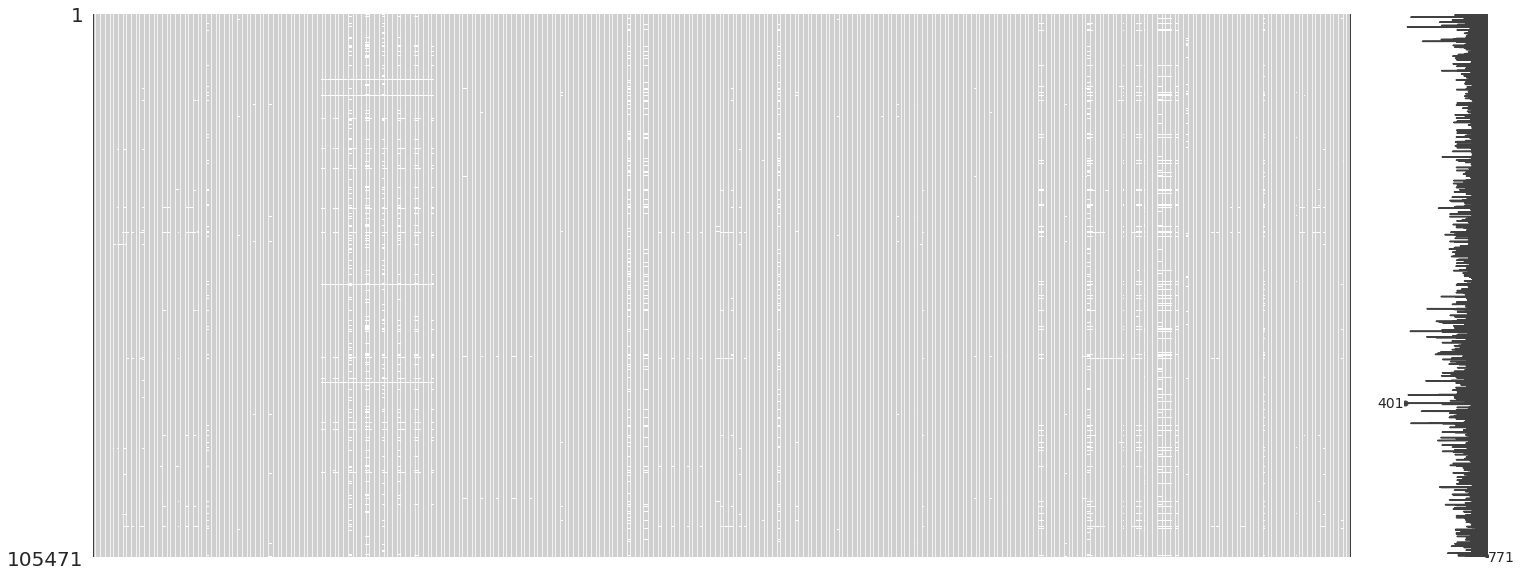

In [13]:
import missingno as mn
mn.matrix(df)

In [0]:
df.fillna(df.mean(), inplace=True)      #fill the missing value with mean. filling only those whose missing proportion is more

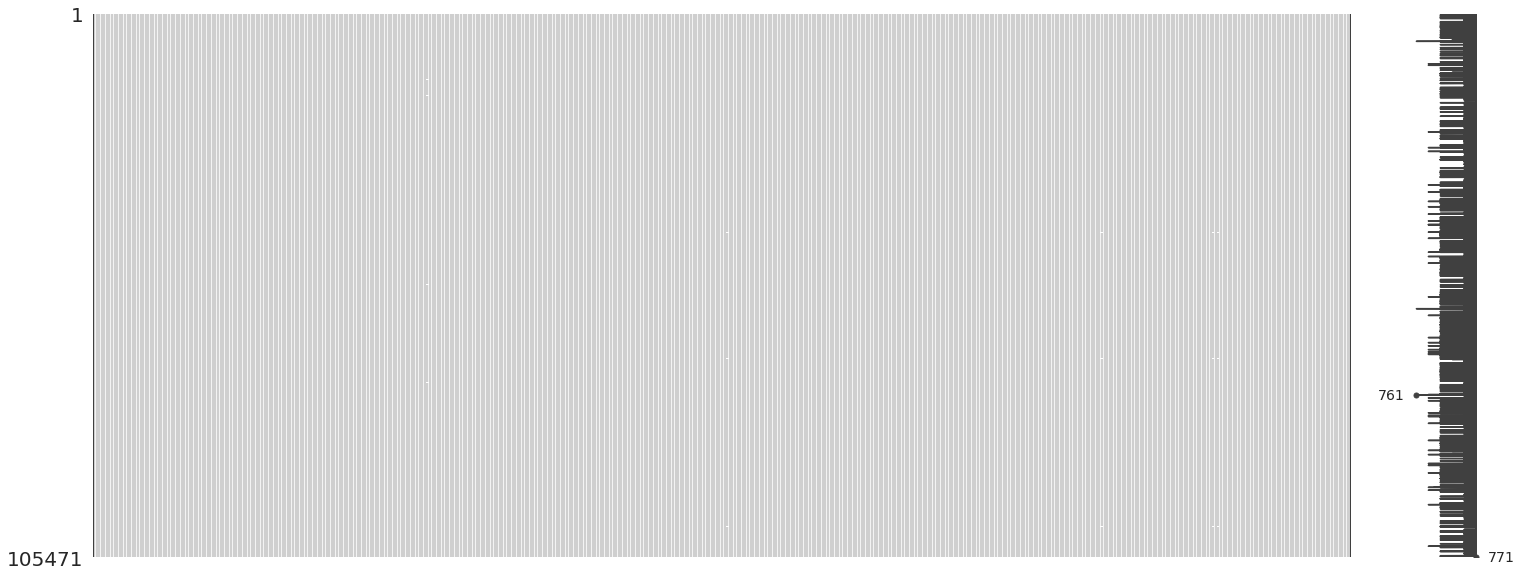

In [15]:
import missingno as mn
mn.matrix(df)

In [16]:
missing_values_table(df).head(50)           #checking if there are any other missing value

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,1291,1.2
f207,1291,1.2
f390,698,0.7
f391,698,0.7
f626,698,0.7
f627,698,0.7
f695,698,0.7
f698,698,0.7
f138,182,0.2
f137,177,0.2


In [17]:
df.dropna(inplace=True)
missing_values_table(df)                   #there are still 12 missing values but the total percentage is less so I dropped them

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
df.shape

(103302, 771)

In [19]:
df.select_dtypes(include=['object']).head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [0]:
# # # Exploratory Data Analysis

for i in df.select_dtypes(include=['object']).columns:
    df.drop(labels=i, axis=1, inplace=True)

In [21]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = df.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f702         NaN
f736         NaN
f764         NaN
Name: loss, dtype: float64


In [0]:
for i in df.columns:
    if len(set(df[i]))==1:
        df.drop(labels=[i], axis=1, inplace=True)

In [23]:
# Find all correlations and sort 
correlations_data = df.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f282    0.010726
f251    0.010915
f221    0.010968
f556    0.011575
f675    0.011606
f13     0.011933
f68     0.013375
f599    0.014165
f597    0.014165
f670    0.014811
f67     0.015012
f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
Name: loss, dtype: float64


In [24]:
df.shape

(103302, 741)

In [0]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    
    
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x

In [0]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(df, 0.6);

In [27]:
df.shape

(103302, 741)

model with the given dataset without converting it to binary classification model

In [28]:
# # # Split Into Training and Testing Sets

# # Separate out the features and targets
features = df.drop(columns='loss')
targets = pd.DataFrame(df['loss'])

# # # Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82641, 740)
(20661, 740)
(82641, 1)
(20661, 1)


In [0]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# # # Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [0]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [32]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(model)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Performance on the test set: Cross Validation Score = 0.9065


In [0]:
#save the model
import pickle 
model.fit(X_train,y_train)
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 
  
# Load the pickled model 
random_from_pickle = pickle.loads(saved_model)

In [34]:
# value_random = accur(random)
# print(value)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# model.fit(X_train, y_train)
model_pred_train = model.predict(X_train)
print(accuracy_score(y_train,model_pred_train))  #TRAINING ACCURACY
# print("Accuracy: %0.2f (+/- %0.2f) " %  value_random)

0.9823816265534057


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
model_pred_test = model.predict(X_test)
print(accuracy_score(y_test,model_pred_test))   #TEST ACCURACY

0.9063936885920333


In [37]:
# Use the loaded pickled model to make predictions 
random_from_pickle.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_test

array([0, 0, 0, ..., 5, 0, 0])

The predictions were baised to 0th class because there are a total of 89 different(unique) values in target variable(loss) and major of them was 0.
My task is to classify the customers into default(loss is not 0) or non-default(loss is 0). So any value be it 1 or 50 or 70, the customer falls into the category of default. So I categorized all the customers whose has loss > 0 as class 1 and the rest whose loss value is 0 as class 0. Now I had only two classes, 0 and 1.

In [39]:
df['loss'] = [0 if b==0 else 1 for b in df.loss]
 
df['loss'].value_counts()

0    93660
1     9642
Name: loss, dtype: int64

In [93]:
# # # Split Into Training and Testing Sets

# # Separate out the features and targets
features = df.drop(columns='loss')
targets = pd.DataFrame(df['loss'])

# # # Split into 80% training and 20% testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(82641, 740)
(20661, 740)
(82641, 1)
(20661, 1)


Text(0.5, 1.0, 'Loss Distribution')

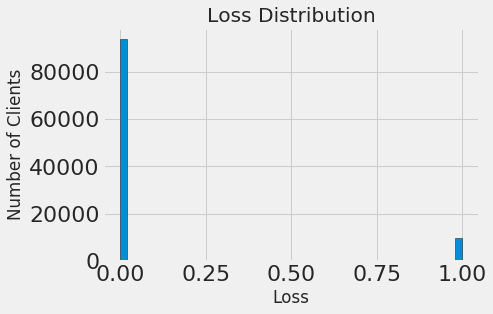

In [96]:
# # Single Variable Plots

figsize=(8, 8)

# Histogram of the loss
plt.style.use('fivethirtyeight')
plt.hist(df['loss'], bins = 50, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

Though there was a lot of class imbalance, I passed the same data into the model to see what is the prediction now.

In [42]:
# # # Split Into Training and Testing Sets

# # Separate out the features and targets
features = df.drop(columns='loss')
targets = pd.DataFrame(df['loss'])

# # # Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82641, 740)
(20661, 740)
(82641, 1)
(20661, 1)


In [0]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# # # Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [0]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(model)

In [0]:
#save the model
import pickle 
model.fit(X_train,y_train)
# Save the trained model as a pickle string. 
saved_model_2 = pickle.dumps(model) 
  
# Load the pickled model 
random_from_pickle = pickle.loads(saved_model_2)

In [47]:
model_pred_test = model.predict(X_test)
print(accuracy_score(y_test,model_pred_test))   #TEST ACCURACY

0.9049900779245922


In [48]:
# Use the loaded pickled model to make predictions 
random_from_pickle.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

The predictions were still not correct. 
I changed the model to logistic regression.

#logistic regression.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_0 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_0 = clf_0.predict(X_test)
print( accuracy_score(pred_y_0, y_test) )
# 0.9216

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9059096849136054


In [51]:
pred_y_0

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
cm = confusion_matrix(y_test, pred_y_0) 
cm

array([[18707,    22],
       [ 1922,    10]])

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 


In [0]:
dtree_predictions = dtree_model.predict(X_test)

In [56]:
dtree_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
print( accuracy_score(dtree_predictions, y_test) )


0.9064904893277189


The predictions using three different algorithms didn't give us accurate results. So it was necessary to balance the classes. I applied two types of sampling techniques. 

#Upsampling
Increasing the minority class, 1


In [58]:
#UPSAMPLE MINORITY CLASS
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.loss==0]
df_minority = df[df.loss==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=93660,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.loss.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    93660
0    93660
Name: loss, dtype: int64

In [59]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = df_upsampled.drop(columns='loss')
targets = pd.DataFrame(df_upsampled['loss'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(149856, 740)
(37464, 740)
(149856, 1)
(37464, 1)


In [87]:
from sklearn.utils import class_weight
# train_labels = np.argmax(y_train,axis=-1)
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_test),y_test)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 1.0000533874325983, 1: 0.999946618267229}

array([18731., 18733.])

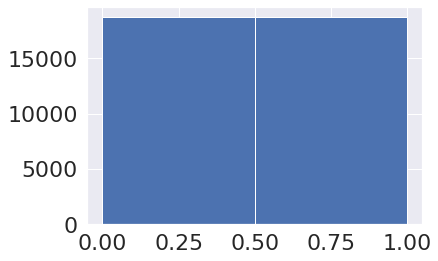

In [88]:
plt.hist(y_test, bins=2)[0]


#Random Forest


In [0]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [0]:
# # # Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [0]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(model)


In [0]:

#save the model
import pickle 
model.fit(X_train,y_train)
# Save the trained model as a pickle string. 
saved_model_random = pickle.dumps(model) 


In [71]:
# value_random = accur(random)
# print(value)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# model.fit(X_train, y_train)
model_pred_train = model.predict(X_train)
print(accuracy_score(y_train,model_pred_train))  #TRAINING ACCURACY
# print("Accuracy: %0.2f (+/- %0.2f) " %  value_random)

0.9999265961990177


In [69]:
  
# Load the pickled model 
random_from_pickle = pickle.loads(saved_model_random)

model_pred_test = model.predict(X_test)
print(accuracy_score(y_test,model_pred_test))   #TEST ACCURACY

# Use the loaded pickled model to make predictions 
random_from_pickle.predict(X_test) 

0.9935404655135597


array([0, 1, 1, ..., 0, 0, 1])

In [70]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

In [72]:
cm = confusion_matrix(y_test, model_pred_test) 
# report = classification_report(y_test, model_pred)
print(cm)

[[18521   210]
 [   32 18701]]


In [74]:
from sklearn.metrics import roc_auc_score

print( roc_auc_score(y_test, model_pred_test) )    #UPSAMPLE's AUROC

0.9935402118528348


#Model trying on Test data

I cleaned the given test file for null values and saved the resultant into a new csv file. The file1.csv is the same 

In [75]:
#testing model on test set
test_df = pd.read_csv('file1.csv')                  #loading the saved csv file

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (205,275,418) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
missing_values_table(test_df).head(100)                  #Again checking for any missing value

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [77]:
test_df.head()

,Unnamed: 0,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,0,0,0,9,0,0,0.79460,0.77228,...,1.1870,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,1,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
1,9,105481,153,7,0.445673,5300,10.0,83293,4121.0,455.0,154.38,153.20,9,0.9204,0.8966,3624718,0.8667,0.8667,0.7572,0.9204,0.9369,0.9286,8.114163e+09,104,112,1676480.0,168.41,131.38,171.32,132.48,104.0,0.9905,0,0,0,34,0,0,0.83335,0.86003,...,0.1006,3.52,35,1359.61,-2824.45,129980.31,6.2318,-0.7255,9.0473,19.0198,16.2105,13.9439,0.346304,10.8121,11.2510,7.1768,4.7455,0.182069,18.1277,15.0993,12.6971,0.338628,23.6960,22.3620,-0.0631,1,-0.78,-0.730,-0.772,-0.5441,-18.50,34,12.15,-8.58,6.26,0.2476,0.8338,0,1,34
2,12,105484,127,8,0.870942,1300,4.0,84020,4606.0,9204.0,125.60,126.84,9,0.8291,0.7886,5227446,0.7886,0.7823,0.6261,0.8083,0.8739,0.8509,1.825722e+09,97,66,1185534.0,97.00,97.00,119.56,107.35,97.0,0.9238,0,0,0,17,0,0,0.79115,0.78407,...,-0.2122,-3.82,18,381.54,-2062.59,29924.08,4.5991,-1.0130,6.5216,12.1948,10.3647,8.8288,0.041289,6.8774,6.1078,3.7409,2.3232,0.072508,11.7679,9.8277,8.2264,0.041558,14.5181,13.8168,-0.1261,1,-0.31,-0.315,-0.309,-0.4506,-7.66,17,4.61,-3.20,2.43,0.2610,-0.6390,0,0,30
3,15,105487,125,10,0.153149,1300,16.0,84882,1715.0,2377.0,126.12,125.22,11,0.8421,0.8067,1026989,0.7805,0.7805,0.6064,0.8205,0.8496,0.8496,1.310884e+09,96,51,1170432.0,96.00,96.00,96.00,96.00,96.0,0.9231,0,0,0,22,0,0,0.76025,0.78245,...,1.6061,36.94,23,500.32,2354.26,27209.19,4.3788,0.4111,7.0341,14.3973,11.8165,9.7774,0.082375,7.1969,6.2383,3.4794,1.9906,0.097381,13.7121,10.9821,8.8678,0.079480,17.0244,15.8333,-0.1504,1,-0.38,-0.480,-0.412,-0.5291,-11.64,22,7.94,-5.73,4.21,0.2846,0.8886,0,0,393
4,18,105490,112,10,0.044429,1900,16.0,76878,479.0,6496.0,117.08,112.70,9,0.7478,0.7049,158450,0.6880,0.6880,0.4433,0.7288,0.7748,0.7748,1.920002e+09,86,52,872728.0,86.00,86.00,120.36,101.22,86.0,0.9556,0,0,0,13,0,0,0.70400,0.68920,...,-0.3850,-5.39,14,468.69,-1196.01,30833.48,5.7732,-0.6246,3.4758,7.8935,6.2182,4.9280,0.069636,3.6842,3.1763,1.6217,0.8399,0.079274,7.7233,6.0079,4.6967,0.063837,10.2930,9.6451,-0.2252,1,-0.67,-0.625,-0.663,-0.4854,-6.31,13,4.26,-3.15,2.44,0.3035,0.6035,1,0,513


In [0]:
k = test_df.drop(['Unnamed: 0'],axis = 1)           #the column 'unnamed is not necessary. so dropping it

In [79]:
k.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,0,0,0,9,0,0,0.79460,0.77228,0.734211,...,1.1870,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,1,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
1,105481,153,7,0.445673,5300,10.0,83293,4121.0,455.0,154.38,153.20,9,0.9204,0.8966,3624718,0.8667,0.8667,0.7572,0.9204,0.9369,0.9286,8.114163e+09,104,112,1676480.0,168.41,131.38,171.32,132.48,104.0,0.9905,0,0,0,34,0,0,0.83335,0.86003,0.571682,...,0.1006,3.52,35,1359.61,-2824.45,129980.31,6.2318,-0.7255,9.0473,19.0198,16.2105,13.9439,0.346304,10.8121,11.2510,7.1768,4.7455,0.182069,18.1277,15.0993,12.6971,0.338628,23.6960,22.3620,-0.0631,1,-0.78,-0.730,-0.772,-0.5441,-18.50,34,12.15,-8.58,6.26,0.2476,0.8338,0,1,34
2,105484,127,8,0.870942,1300,4.0,84020,4606.0,9204.0,125.60,126.84,9,0.8291,0.7886,5227446,0.7886,0.7823,0.6261,0.8083,0.8739,0.8509,1.825722e+09,97,66,1185534.0,97.00,97.00,119.56,107.35,97.0,0.9238,0,0,0,17,0,0,0.79115,0.78407,0.783324,...,-0.2122,-3.82,18,381.54,-2062.59,29924.08,4.5991,-1.0130,6.5216,12.1948,10.3647,8.8288,0.041289,6.8774,6.1078,3.7409,2.3232,0.072508,11.7679,9.8277,8.2264,0.041558,14.5181,13.8168,-0.1261,1,-0.31,-0.315,-0.309,-0.4506,-7.66,17,4.61,-3.20,2.43,0.2610,-0.6390,0,0,30
3,105487,125,10,0.153149,1300,16.0,84882,1715.0,2377.0,126.12,125.22,11,0.8421,0.8067,1026989,0.7805,0.7805,0.6064,0.8205,0.8496,0.8496,1.310884e+09,96,51,1170432.0,96.00,96.00,96.00,96.00,96.0,0.9231,0,0,0,22,0,0,0.76025,0.78245,0.741227,...,1.6061,36.94,23,500.32,2354.26,27209.19,4.3788,0.4111,7.0341,14.3973,11.8165,9.7774,0.082375,7.1969,6.2383,3.4794,1.9906,0.097381,13.7121,10.9821,8.8678,0.079480,17.0244,15.8333,-0.1504,1,-0.38,-0.480,-0.412,-0.5291,-11.64,22,7.94,-5.73,4.21,0.2846,0.8886,0,0,393
4,105490,112,10,0.044429,1900,16.0,76878,479.0,6496.0,117.08,112.70,9,0.7478,0.7049,158450,0.6880,0.6880,0.4433,0.7288,0.7748,0.7748,1.920002e+09,86,52,872728.0,86.00,86.00,120.36,101.22,86.0,0.9556,0,0,0,13,0,0,0.70400,0.68920,0.710823,...,-0.3850,-5.39,14,468.69,-1196.01,30833.48,5.7732,-0.6246,3.4758,7.8935,6.2182,4.9280,0.069636,3.6842,3.1763,1.6217,0.8399,0.079274,7.7233,6.0079,4.6967,0.063837,10.2930,9.6451,-0.2252,1,-0.67,-0.625,-0.663,-0.4854,-6.31,13,4.26,-3.15,2.44,0.3035,0.6035,1,0,513


In [80]:
df_upsampled.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f36,f39,f40,f41,f42,f43,f44,f45,f46,...,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,5,0.73180,0.72124,0.749280,5.0,0.026826,1.037424,0.83380,0.84284,...,-0.7333,-4.40,6,9.76,-21.82,49.18,1.0435,-0.9066,1.5883,3.4154,2.8283,2.3451,0.030594,1.7418,1.5271,0.8474,0.4715,0.028362,3.1611,2.5162,2.0037,0.019636,4.4352,4.2676,-0.1524,-0.40,-0.560,-0.440,-0.6280,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,7,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,0.6903,8.449459e+08,78,50,754416.0,78.0,78.0,78.00,78.00,78.0,0.8478,6,0.65705,0.64069,0.626200,6.0,0.107658,-0.915138,0.72515,0.70127,...,0.0500,0.35,7,51.73,-72.44,798.74,2.7180,-0.8294,1.0740,2.9194,2.1180,1.5666,0.120442,1.1963,1.0322,0.4843,0.2389,0.130160,2.7659,1.9523,1.4059,0.115277,3.2763,2.7962,-0.3097,-0.17,-0.275,-0.203,-0.2300,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,7,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,0.7807,1.308478e+09,89,54,1037651.0,89.0,89.0,100.43,94.37,89.0,0.9175,13,0.74710,0.75878,0.654685,13.0,0.208224,-1.332533,0.80455,0.80819,...,-0.4536,-6.35,14,56.62,-79.48,621.97,1.9592,-0.3632,3.2969,7.2072,5.7062,4.5627,0.226336,3.3277,3.4166,1.8321,0.9979,0.103307,6.8623,5.2963,4.1282,0.219729,8.1381,7.3269,-0.1909,-0.58,-0.540,-0.572,-0.3985,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,7,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,0.8158,1.472752e+09,93,55,1115721.0,93.0,93.0,114.63,102.92,93.0,0.9688,4,0.77405,0.78929,0.750675,4.0,0.043725,-0.947279,0.81150,0.82070,...,0.7500,3.75,5,36.31,18.15,429.81,2.5883,-0.8812,1.2950,2.5777,2.0830,1.6899,0.054630,1.3748,1.3421,0.7982,0.4810,0.081205,2.5571,2.0593,1.6653,0.056470,3.2516,3.0631,-0.1770,-0.75,-0.635,-0.745,-0.5100,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,6,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,0.5455,1.442916e+09,60,21,536400.0,60.0,60.0,60.00,60.00,60.0,0.8451,26,0.60315,0.53367,0.696150,26.0,0.062251,-0.950251,0.71780,0.59004,...,0.4241,11.45,27,2206.14,-10559.05,708436.49,9.0293,-0.8760,6.3852,17.2599,14.2795,11.9179,0.085330,7.2175,6.2262,3.1446,1.6149,0.074286,15.9080,12.5688,9.9844,0.067540,17.5561,15.6079,-0.4444,-0.18,-0.280,-0.182,-0.4277,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [81]:

#I chose 10 factors to predict the target 
desired_factors = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10']
# df_upsampled.drop('loss', axis=1)
# test_desired_factors = k_new.columns

#set prediction data to factors that will predict, and set target to SalePrice
train_data = df[desired_factors]
test_data = k[desired_factors]
target = df.loss

#fitting model with prediction data and telling it my target
model.fit(train_data, target)

model.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
target_test = model.predict(test_data)

In [0]:
k['target']=target_test

In [0]:
k['target']=k['target'].map({1:'Y',0:'N'})


In [85]:
k.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,target
0,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,13,0.7937,0.7937,15984334,0.8197,0.7692,0.6350,0.8621,0.8696,0.8696,3.484800e+09,100,75,1320000.0,100.00,100.00,139.95,117.70,100.0,0.9709,0,0,0,9,0,0,0.79460,0.77228,0.734211,...,11.87,10,69.14,240.57,1333.35,2.3463,0.5994,2.8146,6.4241,5.5673,4.8905,0.114978,3.0063,2.8477,1.7155,1.0628,0.132448,6.0645,5.0808,4.3027,0.100486,7.5185,7.1441,-0.1304,1,-0.71,-0.735,-0.719,-0.5544,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393,N
1,105481,153,7,0.445673,5300,10.0,83293,4121.0,455.0,154.38,153.20,9,0.9204,0.8966,3624718,0.8667,0.8667,0.7572,0.9204,0.9369,0.9286,8.114163e+09,104,112,1676480.0,168.41,131.38,171.32,132.48,104.0,0.9905,0,0,0,34,0,0,0.83335,0.86003,0.571682,...,3.52,35,1359.61,-2824.45,129980.31,6.2318,-0.7255,9.0473,19.0198,16.2105,13.9439,0.346304,10.8121,11.2510,7.1768,4.7455,0.182069,18.1277,15.0993,12.6971,0.338628,23.6960,22.3620,-0.0631,1,-0.78,-0.730,-0.772,-0.5441,-18.50,34,12.15,-8.58,6.26,0.2476,0.8338,0,1,34,N
2,105484,127,8,0.870942,1300,4.0,84020,4606.0,9204.0,125.60,126.84,9,0.8291,0.7886,5227446,0.7886,0.7823,0.6261,0.8083,0.8739,0.8509,1.825722e+09,97,66,1185534.0,97.00,97.00,119.56,107.35,97.0,0.9238,0,0,0,17,0,0,0.79115,0.78407,0.783324,...,-3.82,18,381.54,-2062.59,29924.08,4.5991,-1.0130,6.5216,12.1948,10.3647,8.8288,0.041289,6.8774,6.1078,3.7409,2.3232,0.072508,11.7679,9.8277,8.2264,0.041558,14.5181,13.8168,-0.1261,1,-0.31,-0.315,-0.309,-0.4506,-7.66,17,4.61,-3.20,2.43,0.2610,-0.6390,0,0,30,N
3,105487,125,10,0.153149,1300,16.0,84882,1715.0,2377.0,126.12,125.22,11,0.8421,0.8067,1026989,0.7805,0.7805,0.6064,0.8205,0.8496,0.8496,1.310884e+09,96,51,1170432.0,96.00,96.00,96.00,96.00,96.0,0.9231,0,0,0,22,0,0,0.76025,0.78245,0.741227,...,36.94,23,500.32,2354.26,27209.19,4.3788,0.4111,7.0341,14.3973,11.8165,9.7774,0.082375,7.1969,6.2383,3.4794,1.9906,0.097381,13.7121,10.9821,8.8678,0.079480,17.0244,15.8333,-0.1504,1,-0.38,-0.480,-0.412,-0.5291,-11.64,22,7.94,-5.73,4.21,0.2846,0.8886,0,0,393,N
4,105490,112,10,0.044429,1900,16.0,76878,479.0,6496.0,117.08,112.70,9,0.7478,0.7049,158450,0.6880,0.6880,0.4433,0.7288,0.7748,0.7748,1.920002e+09,86,52,872728.0,86.00,86.00,120.36,101.22,86.0,0.9556,0,0,0,13,0,0,0.70400,0.68920,0.710823,...,-5.39,14,468.69,-1196.01,30833.48,5.7732,-0.6246,3.4758,7.8935,6.2182,4.9280,0.069636,3.6842,3.1763,1.6217,0.8399,0.079274,7.7233,6.0079,4.6967,0.063837,10.2930,9.6451,-0.2252,1,-0.67,-0.625,-0.663,-0.4854,-6.31,13,4.26,-3.15,2.44,0.3035,0.6035,1,0,513,N


In [0]:
k[['id','target']].to_csv('submission1.csv')


I also performed logistic regression by downsampling the data labels. 

In [97]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=9642,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.loss.value_counts()

1    9642
0    9642
Name: loss, dtype: int64

In [98]:
# Separate input features (X) and target variable (y)
y = df_downsampled.loss
X = df_downsampled.drop('loss', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
print( np.unique( pred_y_2 ) )

print( accuracy_score(y, pred_y_2) )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 1]
0.5133789670192906


In [101]:
  print( roc_auc_score(y, pred_y_2) )    #DOWNSAMPLE's AUROC
  #0.5

0.5133789670192906


In [102]:
cm = confusion_matrix(y, pred_y_2) 
cm

array([[1343, 8299],
       [1085, 8557]])

#I got satisfactory results using Random Forest.